In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [15]:
df = pd.read_csv('../Preprocesssing/pre-processed.csv',header = 'infer') 

In [16]:
df.head()

,tweets,ClassLabel
0,a a woman you shouldnt complain about cleaning...,2
1,rtboydatscoldtygadwnbad for cuffindathoeinthe1...,1
2,dawg you ever fuck a bitch and she start to cr...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1


In [17]:
ClassLabel = df['ClassLabel']
tweets = df.tweets

In [18]:
tokenizer = Tokenizer()

In [21]:
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)

In [22]:
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
padded_sequences

array([[    0,     0,     0, ...,     3,    48,    45],
       [    0,     0,     0, ...,    22,  8922,   487],
       [    0,     0,     0, ...,  1018,     2,    46],
       ...,
       [    0,     0,     0, ...,    12,    30,   281],
       [    0,     0,     0, ...,  5087,     5,   537],
       [    0,     0,     0, ...,   182,   112, 19796]], dtype=int32)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, ClassLabel, test_size=0.2, random_state=110123184)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=110123184)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [24]:
### building the model

In [9]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(3, activation='sigmoid'))


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
434/434 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9802 - val_loss: 0.2586 - val_accuracy: 0.8626
Epoch 2/50
434/434 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9849 - val_loss: 0.2734 - val_accuracy: 0.8603
Epoch 3/50
434/434 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.2886 - val_accuracy: 0.8581
Epoch 4/50
434/434 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9900 - val_loss: 0.3003 - val_accuracy: 0.8557
Epoch 4: early stopping


In [12]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = y_test.T
print(classification_report(y_test, y_pred))

155/155 [==============================] - 0s 245us/step
              precision    recall  f1-score   support

           0       0.53      0.21      0.30       292
           1       0.90      0.95      0.92      3851
           2       0.77      0.73      0.75       814

    accuracy                           0.87      4957
   macro avg       0.73      0.63      0.66      4957
weighted avg       0.86      0.87      0.86      4957



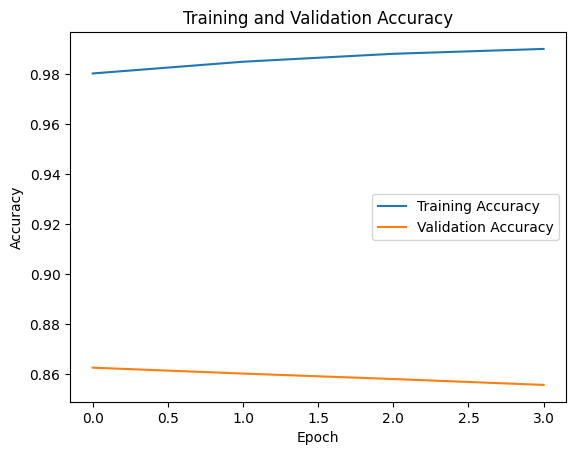

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')


if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()